In [1]:
import pandas as pd
import numpy as np
#import Textdistance
import re
from collections import Counter
import os


from google.colab import drive
drive.mount("/content/drive")
path = '/content/drive/MyDrive/Colab Notebooks/Datathon'

os.chdir(path)
!ls

Mounted at /content/drive
Datathon.ipynb	train.csv


In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
#parse_dates=['OPERATIONDATE']
df = pd.read_csv('train.csv', parse_dates=['OPERATIONDATE'], index_col='OPERATIONDATE')
df.reset_index(inplace=True)

#pd.to_datetime(df['OPERATIONDATE'])
#df['OPERATIONDATE'] = df['OPERATIONDATE'].astype('datetime64[ns]')

In [3]:
df.dtypes

OPERATIONDATE    datetime64[ns]
CASHPOINTID               int64
AMT_SCALED              float64
dtype: object

In [4]:
df = df.sort_values(by='OPERATIONDATE')

In [ ]:
#df = df.groupby('OPERATIONDATE')['AMT_SCALED'].sum().reset_index()

In [5]:
df['year'] = [d.year for d in df['OPERATIONDATE']]
years = df['year'].unique()


In [6]:
print("years:", years)

years: [2017 2018 2019]


In [ ]:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

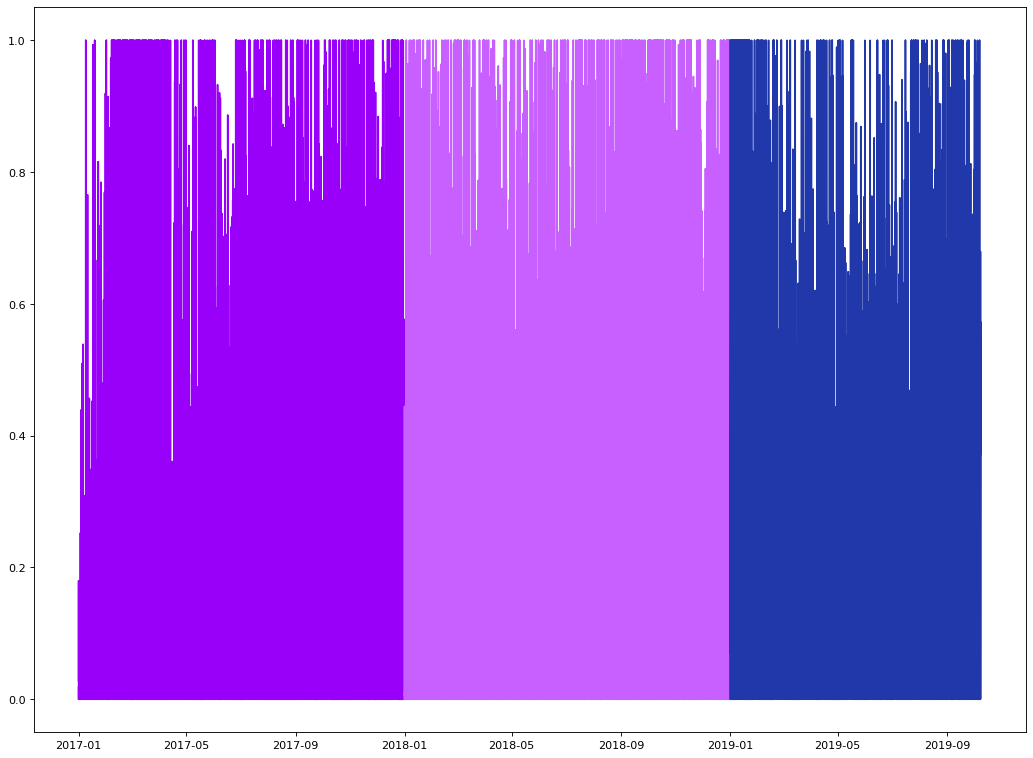

In [ ]:
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i >= 0:        
        plt.plot('OPERATIONDATE', 'AMT_SCALED', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
      #  plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'AMT_SCALED'][-1:].values[0], y, fontsize=12, color=mycolors[i])